In [57]:
import jax.numpy as jnp
from jax import random
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets

from lqg.model import LQG
from lqg.ccg import xcorr

In [68]:
class StabilizationTask(LQG):
    def __init__(self, rw_std=5., c=1., motor_noise=1., sigma_x=60., sigma_y=60., corr=0.):
        
        dt = 1. / 60.

        A = jnp.eye(4)
        B = jnp.array([[0., dt, 0., 0.],
                       [0., 0., 0., dt]]).T
        
        C = jnp.array([[1., -1., 0., 0.],
                       [0., 0., 1., -1.]])
        
        V = jnp.diag(jnp.array([rw_std, motor_noise, rw_std, motor_noise]))
        W = jnp.array([[sigma_x, corr], [0, sigma_y]])
        
        Q = jnp.array([[1., -1., 0., 0.],
                       [-1., 1., 0., 0.],
                       [0., 0., 1., -1.],
                       [0., 0., -1., 1.]])
        R = jnp.eye(2) * c
        
        super().__init__(A=A, B=B, C=C, V=V, W=W, Q=Q, R=R)

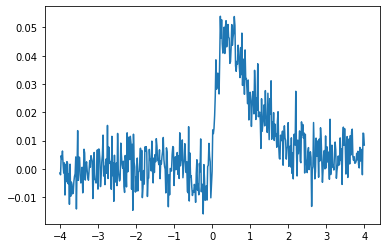

In [72]:
model = StabilizationTask(motor_noise=1., c=1., sigma_x=60., sigma_y=60.)
x = model.simulate(random.PRNGKey(0), n=20, T=1100)
vels = jnp.diff(x, axis=0)
lags, correls = xcorr(vels[...,1].T, vels[...,0].T, maxlags=240)
plt.plot(lags / 60., correls.mean(axis=0))